In [18]:
using ReinforcementLearning

In [19]:
env = TicTacToeEnv()

# TicTacToeEnv

## Traits

| Trait Type        |                                                                     Value |
|:----------------- | -------------------------------------------------------------------------:|
| NumAgentStyle     |                                                           MultiAgent{2}() |
| DynamicStyle      |                                                              Sequential() |
| InformationStyle  |                                                      PerfectInformation() |
| ChanceStyle       |                                                           Deterministic() |
| RewardStyle       |                                                          TerminalReward() |
| UtilityStyle      |                                                                 ZeroSum() |
| ActionStyle       |                                                           FullActionSet() |
| StateStyle        | (Observation{String}(), Observation{Int64}(), Observation{BitArray{3}}()) |
| DefaultStateStyle |                                                     Observation{String}() |

## Is Environment Terminated?

No

## State Space

`WorldSpace{String}()`

## Action Space

`Base.OneTo(9)`

## Players

  * `ReinforcementLearningEnvironments.Cross()`
  * `ReinforcementLearningEnvironments.Nought()`

## Current Player

`ReinforcementLearningEnvironments.Cross()`

## Current State

```
...
...
...

```


In [20]:
state(env) |> Text

...
...
...


In [21]:
state(env, Observation{Int}())

1

In [22]:
state(env, Observation{BitArray{3}}())

3×3×3 BitArray{3}:
[:, :, 1] =
 1  1  1
 1  1  1
 1  1  1

[:, :, 2] =
 0  0  0
 0  0  0
 0  0  0

[:, :, 3] =
 0  0  0
 0  0  0
 0  0  0

In [27]:
env(1)
env(2)
env(3)
env(4)
env(5)
env(6)
env(7)
state(env) |> Text

xox
ox.
xo.


In [28]:
is_terminated(env), [reward(env, p) for p in players(env)]

(true, [1, -1])

In [30]:
reset!(env)

ReinforcementLearningEnvironments.Cross()

In [31]:
state(env) |> Text

...
...
...


## Random Policy

In [33]:
policy = RandomPolicy()

typename(RandomPolicy)
├─ action_space => typename(Nothing)
└─ rng => typename(Random._GLOBAL_RNG)


In [34]:
[policy(env) for _ in 1:10]

10-element Vector{Int64}:
 4
 8
 7
 8
 6
 9
 9
 4
 1
 5

In [35]:
state(env) |> Text

...
...
...


### Policy + Environment

In [36]:
run(policy, env, StopAfterEpisode(1))

EmptyHook()

In [37]:
multi_agent_policy = MultiAgentManager(
	(
		NamedPolicy(p=>RandomPolicy())
		for p in players(env)
	)...
)

typename(MultiAgentManager)
└─ agents => typename(Dict)


In [38]:
multi_agent_hook = MultiAgentHook(
	(
		p => TotalRewardPerEpisode()
		for p in players(env)
	)...
)

MultiAgentHook(Dict{Any, Any}(ReinforcementLearningEnvironments.Nought() => TotalRewardPerEpisode(Float64[], 0.0, true), ReinforcementLearningEnvironments.Cross() => TotalRewardPerEpisode(Float64[], 0.0, true)))

In [39]:
run(multi_agent_policy,	env, StopAfterEpisode(10), multi_agent_hook)

            ⠀⠀⠀⠀⠀⠀⠀⠀⠀Total reward per episode⠀⠀⠀⠀⠀⠀⠀⠀⠀ 
            ┌────────────────────────────────────────┐ 
          1 │⠉⠉⠉⠉⠉⠉⠉⠉⠙⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
            │⠀⠀⠀⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
            │⠀⠀⠀⠀⠀⠀⠀⠀⠀⢱⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡜⠸⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
            │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠸⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡇⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
            │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⢰⠁⠀⢣⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
            │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢣⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
            │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⡇⠀⠀⠈⡆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
   Score    │⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠬⡦⠤⠤⠤⠤⠤⠤⠤⢤⠧⠤⠤⠤⢧⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤│ 
            │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
            │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⡎⠀⠀⠀⠀⠘⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
            │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⡄⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
            │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⢱⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
            │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢱⠀⠀⠀⠀⠀⡸⠀⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
            │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
         -1 │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣇⣀⣀⣀⣰⠁⠀⠀⠀⠀⠀⠀⠀⢣⣀⣀⣀⣀⣀⣀⣀⣀⣀⣀⣀⣀⣀│ 
            └───────────────────────────────────

⠀⠀⠀⠀│ 
            │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⠀⠀⡸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
            │⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡇⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
            │⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢇⢠⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
            │⠀⠀⠀⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
         -1 │⣀⣀⣀⣀⣀⣀⣀⣀⣀⠇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⡎⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
            └────────────────────────────────────────┘ 
            ⠀1⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀10⠀ 
            ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Episode⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀ 


MultiAgentHook(Dict{Any, Any}(ReinforcementLearningEnvironments.Nought() => TotalRewardPerEpisode([1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0], 0.0, true), ReinforcementLearningEnvironments.Cross() => TotalRewardPerEpisode([-1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0], 0.0, true)))

In [40]:
x, o = players(env)

(ReinforcementLearningEnvironments.Cross(), ReinforcementLearningEnvironments.Nought())

In [41]:
using Plots

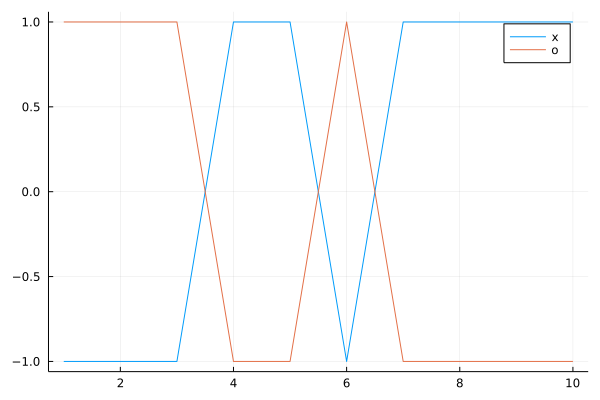

In [42]:
plot(multi_agent_hook[x][]; label="x")
plot!(multi_agent_hook[o][]; label="o")

In [43]:
using Flux
A = TabularVApproximator(;n_state=10, init=0.0, opt=InvDecay(1.0))
A

TabularVApproximator{Vector{Float64}, InvDecay}([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], InvDecay(1.0, IdDict{Any, Any}()))

A TabularVApproximator uses a Vector underlying to estimate the state value. Here the Tabular means that the state is required to be an Integer. The code above created a TabularVApproximator which has a table of 10 states, 1:10, and each state value is initialized to 0.0. We can get the estimation by:

In [46]:
A(1)

0.0

In [47]:
update!(A, 2 => A(2) - 5.)

0-dimensional view(::Vector{Float64}, 2) with eltype Float64:
3.333333333333333

In [48]:
examples = 1:10
for x in examples
    update!(A, 1 => A(1) - x)
end
A(1) == (0. #= the init value is 0. =# + sum(examples)) / (1+length(examples))

true

#### MonteCarloLearner

In [49]:
M = MonteCarloLearner(;
	approximator = TabularVApproximator(;n_state=5478, init=0., opt=InvDecay(1.0)),
	γ = 1.0,
	kind = FIRST_VISIT,
	sampling = NO_SAMPLING
)

typename(MonteCarloLearner)
├─ approximator => typename(TabularApproximator)
│  ├─ table => 5478-element Vector{Float64}
│  └─ optimizer => typename(InvDecay)
│     ├─ gamma => 1.0
│     └─ state => typename(IdDict)
├─ γ => 1.0
├─ kind => typename(ReinforcementLearningZoo.FirstVisit)
└─ sampling => typename(ReinforcementLearningZoo.NoSampling)


In [50]:
M(1)

0.0

In [51]:
M(env)

MethodError: MethodError: no method matching (::TabularVApproximator{Vector{Float64}, InvDecay})(::String)
Closest candidates are:
  (::TabularVApproximator)(!Matched::Int64) at ~/.julia/packages/ReinforcementLearningCore/hGrFE/src/policies/q_based_policies/learners/approximators/tabular_approximator.jl:45

In [52]:
E = DefaultStateStyleEnv{Observation{Int}()}(env)

# TicTacToeEnv |> DefaultStateStyleEnv

## Traits

| Trait Type        |                                                                     Value |
|:----------------- | -------------------------------------------------------------------------:|
| NumAgentStyle     |                                                           MultiAgent{2}() |
| DynamicStyle      |                                                              Sequential() |
| InformationStyle  |                                                      PerfectInformation() |
| ChanceStyle       |                                                           Deterministic() |
| RewardStyle       |                                                          TerminalReward() |
| UtilityStyle      |                                                                 ZeroSum() |
| ActionStyle       |                                                           FullActionSet() |
| StateStyle        | (Observation{String}(), Observation{Int64}(), Observation{BitArray{3}}()) |
| DefaultStateStyle |                                                      Observation{Int64}() |

## Is Environment Terminated?

Yes

## State Space

`Base.OneTo(5478)`

## Action Space

`Base.OneTo(9)`

## Players

  * `ReinforcementLearningEnvironments.Cross()`
  * `ReinforcementLearningEnvironments.Nought()`

## Current Player

`ReinforcementLearningEnvironments.Nought()`

## Current State

```
940
```


In [54]:
state(E)

940

In [55]:
explorer = EpsilonGreedyExplorer(0.1)

EpsilonGreedyExplorer{:linear, false, Random._GLOBAL_RNG}(0.1, 1.0, 0, 0, 1, Random._GLOBAL_RNG(), true)

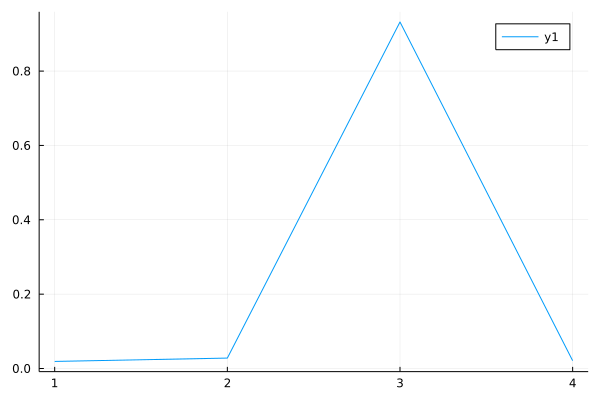

In [56]:
values = [1, 2, 3, 1]
N = 1000
actions = [explorer(values) for _ in 1:N]
plot([sum(actions .== i)/N for i in 1:length(values)])

In [57]:
function select_action(env, V)
	A = legal_action_space(env)
    values = map(A) do a
        V(child(env, a))
    end
    A[explorer(values)]
end

select_action (generic function with 1 method)

In [58]:
P = VBasedPolicy(;learner=M, mapping=select_action)

typename(VBasedPolicy)
├─ learner => typename(MonteCarloLearner)
│  ├─ approximator => typename(TabularApproximator)
│  │  ├─ table => 5478-element Vector{Float64}
│  │  └─ optimizer => typename(InvDecay)
│  │     ├─ gamma => 1.0
│  │     └─ state => typename(IdDict)
│  ├─ γ => 1.0
│  ├─ kind => typename(ReinforcementLearningZoo.FirstVisit)
│  └─ sampling => typename(ReinforcementLearningZoo.NoSampling)
└─ mapping => typename(typeof(select_action))


In [59]:
reset!(E)

ReinforcementLearningEnvironments.Cross()

In [60]:
P(E)

1

In [61]:
run(P, E, StopAfterEpisode(10))

EmptyHook()

## Training

In [62]:
policies = MultiAgentManager(
	(
		Agent(
			policy = NamedPolicy(
				p => VBasedPolicy(;
					learner=MonteCarloLearner(;
						approximator = TabularVApproximator(;
							n_state=length(state_space(E)),
							init=0.,
							opt=InvDecay(1.0)
						),
						γ = 1.0,
						kind = FIRST_VISIT,
						sampling = NO_SAMPLING
					),
					mapping = select_action
				)
			),
			trajectory =VectorSARTTrajectory(
					;state=Int,
					action=Union{Int, NoOp},
					reward=Int,
					terminal=Bool
			)
		)
		for p in players(E)
	)...
)

┌ Warning: use values(kwargs) and keys(kwargs) instead of kwargs.data and kwargs.itr
│   caller = VectorTrajectory(; kwargs::Base.Pairs{Symbol, Type, NTuple{4, Symbol}, NamedTuple{(:state, :action, :reward, :terminal), Tuple{DataType, Union, DataType, DataType}}}) at trajectory.jl:455
└ @ ReinforcementLearningCore /home/vscode/.julia/packages/ReinforcementLearningCore/hGrFE/src/policies/agents/trajectories/trajectory.jl:455


typename(MultiAgentManager)
└─ agents => typename(Dict)


In [64]:
run(policies, E, StopAfterEpisode(100_000))

Progress:   2%|▊                                        |  ETA: 0:00:57

Progress:  19%|███████▊                                 |  ETA: 0:00:20

Progress:  25%|██████████▏                              |  ETA: 0:00:17

Progress:  30%|████████████▎                            |  ETA: 0:00:16

Progress:  35%|██████████████▍                          |  ETA: 0:00:14

Progress:  40%|████████████████▌                        |  ETA: 0:00:13

Progress:  45%|██████████████████▋                      |  ETA: 0:00:12

Progress:  50%|████████████████████▊                    |  ETA: 0:00:11

Progress:  56%|██████████████████████▊                  |  ETA: 0:00:09

Progress:  61%|████████████████████████▉                |  ETA: 0:00:08

Progress:  66%|███████████████████████████              |  ETA: 0:00:07

Progress:  71%|█████████████████████████████▏           |  ETA: 0:00:06

Progress:  76%|███████████████████████████████▎         |  ETA: 0:00:05

Progress:  81%|█████████████████████████████████▍       |  ETA: 0:00:04

Progress:  87%|███████████████████████████████████▌     |  ETA: 0:00:03

Progress:  92%|█████████████████████████████████████▋   |  ETA: 0:00:02

Progress:  97%|███████████████████████████████████████▊ |  ETA: 0:00:01

Progress: 100%|█████████████████████████████████████████| Time: 0:00:20


EmptyHook()

## Testing

In [65]:
test_policies = MultiAgentManager([p.policy for (x, p) in (policies.agents)]...)

typename(MultiAgentManager)
└─ agents => typename(Dict)


In [66]:
hook = MultiAgentHook(
	(
		p => TotalRewardPerEpisode()
		for p in players(E)
	)...
)	

MultiAgentHook(Dict{Any, Any}(ReinforcementLearningEnvironments.Nought() => TotalRewardPerEpisode(Float64[], 0.0, true), ReinforcementLearningEnvironments.Cross() => TotalRewardPerEpisode(Float64[], 0.0, true)))